## 케라스의 학습과정

### 01. 배치 사이즈와 에포크
 케라스에서 모델을 학습할 때, fit() 함수를 사용한다.

model.fit(x, y, batch_size=32, epochs=10) <br>

* x : 입력 데이터
* y : 라벨값
* batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지 지정
* epochs : 학습 반복 횟수 
    
* x : 100, y:100개의 문항, batch_size:100이라면 100개의 문항을 풀고 가중치를 갱신한다.

### 02. 가중치 갱신 알고리즘
 * 모델의 결과값과 주어진 라벨값과의 오차를 줄이기 위해 역전파(Backpropagation) 알고리즘으로 가중치 갱신

* 배치 사이즈가 10이라면 100문제를 10문제씩 풀고 가중치를 갱신하므로 총 10번의 갱신이 이루어짐.
* 배치 사이즈가 1이라면 100문제를 1문제씩 풀고 가중치를 갱신하므로 총 100번의 갱신이 이루어짐.

### 장단점
 * 한문제 풀고 갱신하게 되면 시간이 걸린다.
 * 100문제 풀고 마지막에 한번 갱신하면 까먹게 된다.
 * 열문제 풀고 10번 갱신하는게 낫지 않을까?

### epochs(에포크) : 모의고사를 몇번이나 풀어볼 것인가?

#### 에포크가 많으면 좋을까? 많으면 많을 수록 과적합 현상이 발생하므로 역효과가 있을 수 있다.
#### 따라서 학습할때 오버피팅이 일어나는지 체크하다가 조짐이 보이면 학습을 중단한다.

## 03. 히스토리 기능 사용하기
 * 케라스는 fit() 함수를 사용한다. 이 함수가 돌려주는 값은 히스토리 객체를 얻을 수 있다.
 *  매 에포크 마다의 훈련 손실값(loss)
 *  매 에포크 마다의 훈련 정확도(acc)
 *  매 에포크 마다의 검증 손실값(val_loss)
 *  매 에포크 마다의 검증 정확도(val_acc)

In [3]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Using TensorFlow backend.


In [4]:
hist = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_data=(X_test, Y_test))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.4327 - acc: 0.8832 - val_loss: 0.2651 - val_acc: 0.9242
Epoch 2/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.2430 - acc: 0.9310 - val_loss: 0.2079 - val_acc: 0.9390
Epoch 3/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.1950 - acc: 0.9444 - val_loss: 0.1749 - val_acc: 0.9490
Epoch 4/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.1649 - acc: 0.9531 - val_loss: 0.1580 - val_acc: 0.9528
Epoch 5/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.1433 - acc: 0.9601 - val_loss: 0.1379 - val_acc: 0.9582
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1278 - acc: 0.9641 - val_loss: 0.1275 - val_acc: 0.9619
Epoch 7/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1156 - acc: 0.9668 - val_loss: 0.1175 - 

* train_loss(노란색) : 훈련 손실값이며 x축은 에포크 수, 좌측 y축은 손실값을 나타냅니다.
* val_loss(빨간색) : 검증 손실값이며 x축은 에포크 수, 좌측 y축은 손실값을 나타냅니다.
* train_acc(파란색) : 훈련 정확도이며 x축은 에포크 수, 우측 y축은 정확도를 나타냅니다.
* val_acc(녹색) : 검증 정확도이며 x축은 에포크 수, 우측 y축은 정확도를 나타냅니다

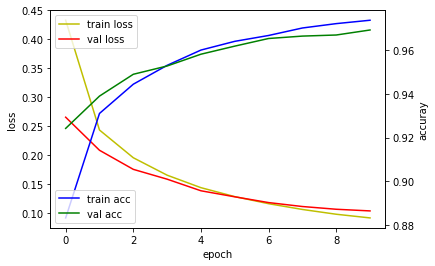

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()